The aim of this project is to classify messages into Spam vs non-Spam messages.
The dataset has been taken from Kaggle. The data consists of email body and labels for text classification. 1) Message body  2) Labels

### LOADING REQUIRED PACKAGES

In [1]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import os

In [2]:
#importing the required sklearn libraries
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

### READING DATA

In [3]:
# Reading files
nlp_train = pd.read_csv("C:\\NLP\\SMS_train.csv", low_memory=False)
nlp_test = pd.read_csv("C:\\NLP\\SMS_test.csv", low_memory=False)
nlp_train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [4]:
print(nlp_train.shape)
print(nlp_test.shape)

(957, 3)
(125, 3)


In [5]:
#Checking for null values in train dataset
nlp_train.isnull().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [6]:
#Checking for null values in test dataset
nlp_test.isnull().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [7]:
#Lets drop Serial number column
nlp_train = nlp_train.drop(['S. No.'], axis=1)
nlp_test = nlp_test.drop(['S. No.'], axis=1)

In [8]:
nlp_train['Message_body'][:9]

0                           Rofl. Its true to its name
1    The guy did some bitching but I acted like i'd...
2    Pity, * was in mood for that. So...any other s...
3                 Will ü b going to esplanade fr home?
4    This is the 2nd time we have tried 2 contact u...
5    REMINDER FROM O2: To get 2.50 pounds free call...
6                                         Huh y lei...
7    Why don't you wait 'til at least wednesday to ...
8                                  Ard 6 like dat lor.
Name: Message_body, dtype: object

### DATA VISUALIZATION

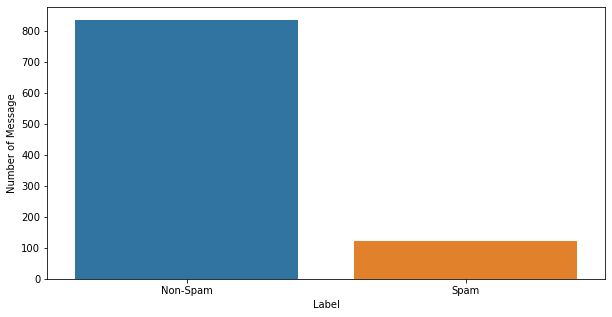

In [9]:
#Visualizing class distribution 
plt.figure(figsize=(10,5))
sns.countplot(x='Label',data = nlp_train)
plt.ylabel("Number of Message")
plt.xlabel("Label")
plt.show()

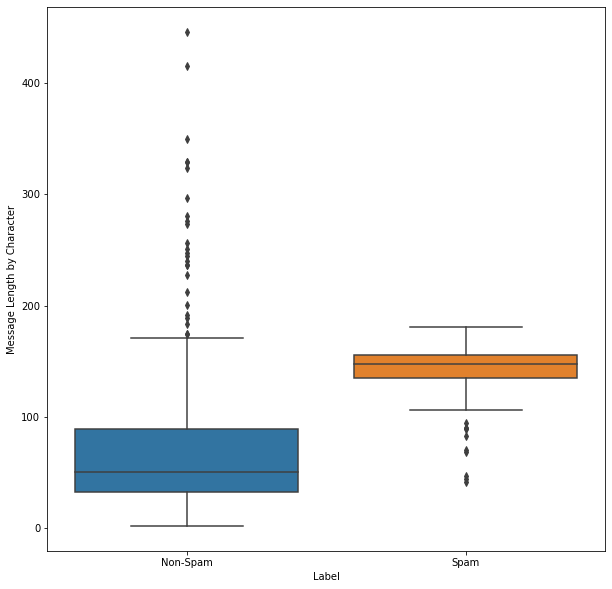

In [10]:
#Visualizing Message length by characaters
plt.figure(figsize=(10,10))
train_sent = nlp_train['Message_body'].str.len()
sns.boxplot(x="Label",y=train_sent,data=nlp_train)
plt.xlabel("Label")
plt.ylabel("Message Length by Character")
plt.show()

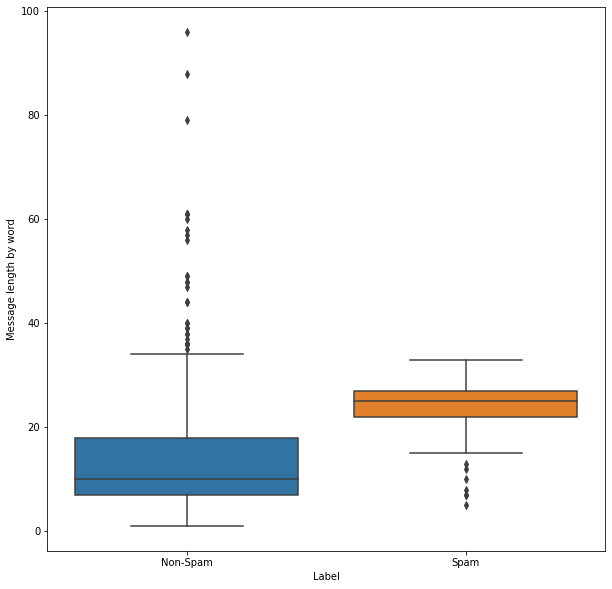

In [11]:
#Visualizing Message length by words
plt.figure(figsize=(10,10))
train_sent = nlp_train['Message_body'].str.split().map(lambda x : len(x))
sns.boxplot(x="Label",y=train_sent,data=nlp_train)
plt.xlabel("Label")
plt.ylabel("Message length by word")
plt.show()


### DATA CLEANING

In [12]:
#Removing URLS
def url_clean(Message_body):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',Message_body)

In [13]:
#Removing HTML tags
def html_clean(Message_body):
    html = re.compile(r'<.*?>')
    return html.sub(r'',Message_body)

In [14]:
def remove_emoji(Message_body):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', Message_body)

In [15]:
nlp_train['Message_body']= nlp_train['Message_body'].apply(lambda x : url_clean(x))
nlp_train['Message_body']= nlp_train['Message_body'].apply(lambda x : html_clean(x))

nlp_test['Message_body']= nlp_test['Message_body'].apply(lambda x : url_clean(x))
nlp_test['Message_body']= nlp_test['Message_body'].apply(lambda x : html_clean(x))

nlp_test['Message_body']= nlp_test['Message_body'].apply(lambda x : remove_emoji(x))
nlp_test['Message_body']= nlp_test['Message_body'].apply(lambda x : remove_emoji(x))

### DATA PREPARATION

In [16]:
#Extracting the message and label for modelling 
X_train = nlp_train["Message_body"]
y_train = nlp_train["Label"]
X_test = nlp_test['Message_body']
y_test = nlp_test["Label"]

##### BAG OF WORDS VECTORIZATION 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(X_train)

test_x_vectors = vectorizer.transform(X_test)

print(X_train[0])
print(train_x_vectors[0].toarray())

Rofl. Its true to its name
[[0. 0. 0. ... 0. 0. 0.]]


### Classification

##### LINEAR SMV

In [18]:
#Linear SVM
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, y_train)

X_test[0]

clf_svm.predict(test_x_vectors[0])

array(['Spam'], dtype=object)

##### DECISION TREE

In [19]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, y_train)

clf_dec.predict(test_x_vectors[0])

array(['Spam'], dtype=object)

##### NAIVE BAYES

In [20]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

clf_gnb = DecisionTreeClassifier()
clf_gnb.fit(train_x_vectors, y_train)

clf_gnb.predict(test_x_vectors[0])

array(['Spam'], dtype=object)

##### LOGISTIC REGRESSION 

In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, y_train)

clf_log.predict(test_x_vectors[0])

array(['Spam'], dtype=object)

### EVALUATION

In [22]:
# Mean Accuracy
print(clf_svm.score(test_x_vectors, y_test))
print(clf_dec.score(test_x_vectors, y_test))
print(clf_gnb.score(test_x_vectors, y_test))
print(clf_log.score(test_x_vectors, y_test))

0.912
0.816
0.832
0.64


In [23]:
# F1 Scores
from sklearn.metrics import f1_score

f1_score(y_test, clf_svm.predict(test_x_vectors), average=None)


array([0.89908257, 0.92198582])

In [24]:
test_set = ['very fun', "bad book do not buy", 'pls reply 2 this text with your valid name', 'for your inclusive text credits']
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)

array(['Non-Spam', 'Non-Spam', 'Spam', 'Spam'], dtype=object)

## TUNING OUR MODEL (with Grid Search)

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_x_vectors, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

In [26]:
print(clf.score(test_x_vectors, y_test))

0.92


I built 4 different models (linear SMV, Decision Tree, Naive Bayes, Logistic Regression) for predicting spam vs non-spam messages. Mean accuracy and f1 score for linear SMV is the best out of the 4 models. I also tuned the model with grid search to improve the score further.